<a href="https://colab.research.google.com/github/victorgil777/CUVD/blob/main/REDIS_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicción del riesgo de muerte de pacientes infectados con COVID-19.** 

---



La llegada de la tercera ola y el surgimiento de nuevas variantes del COVID-19 a nivel mundial han llevado al colapso de las UCI de diversas clínicas y hospitales a nivel mundial. A pesar de que a la fecha ya existen vacunas (Pfizer, Moderna, Aztrazeneca, Sinovac, J&J) que brindan una inmunidad temporal, el incremento de personas infectadas y muertes no cesa.

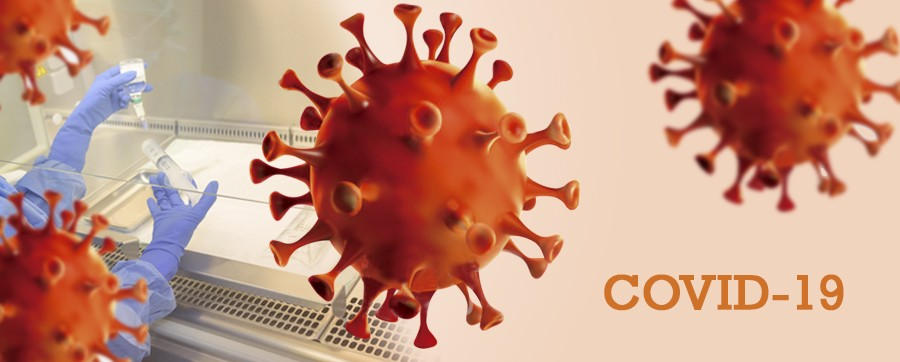

El objetivo de este trabajo es desarrollar modelos de clasificación empleando diferentes técnicas de Machine Learning (ML) (Naive Bayes, Regresión Logística, Máquinas de vectores de soporte SVM, K-Nearest Neighbor, Random Forests, Árboles de Decisión y Redes neuronales artificiales RNA) que permitan identificar el riesgo de muerte de pacientes infectados con el virus.

Se empleó una base de datos de 1000 pacientes mexicanos infectados con el virus, la cual reunía información demográfica (sexo, edad, raza / etnia), personal (fumador activo/no activo, número de medicamentos) y comorbilidades (diabetes, enfermedad pulmonar obstructiva crónica, asma, neumonía, inmunosuprimido, hipertensión, enfermedad cardiovascular, obesidad, insuficiencias renal crónica, entre otras), 

In [336]:
# Primer paso importar la librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
import tensorflow
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
warnings.filterwarnings("ignore")

A continuación cargamos la base de datos de los pacientes, recuerde que debe nombrar el archivo "PACIENTES.csv".

In [337]:
from google.colab import files
uploaded = files.upload()


Saving PACIENTES.csv to PACIENTES (13).csv


In [338]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('PACIENTES', name)


PACIENTES PACIENTES.csv


In [339]:
import pandas as pd
df = pd.read_csv('PACIENTES.csv')


In [340]:
print(df.shape)

(1000, 14)


In [341]:
df.head()

,Muerto,Genero,Edad,NeumonIa,Diabetes,EPOC,Asma,Inmunosuprimido,Hipertension,Otra_enfermedad,E_Cardiovascular,Obesidad,Enfermedad_renal,Fumador
0,1,2,27,2,2,2,2,2,2,2,2,2,2,2
1,1,2,24,2,2,2,2,2,2,2,2,2,2,2
2,1,1,54,2,2,2,2,2,2,2,2,1,2,2
3,1,2,30,1,2,2,2,2,2,2,2,2,2,2
4,0,1,60,2,1,2,2,2,1,2,1,2,2,2


In [342]:
# Definr la etiqueta de salida y lvas variables predictoras
X = df_norm.iloc[:, [2, 13]].values
y = df_norm.iloc[:, 1].values

In [343]:
# Definir el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [344]:
# Función par calcular la validación cruzada
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]

In [345]:
def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]

In [346]:
def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]

In [347]:
def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]

In [348]:
def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)

In [349]:
# Accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [350]:
# Propósito de la validación cruzada
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [351]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [352]:
# Lista alamcenada de las acc y rcc de las salidas de cada modelo
acc = []
roc = []

**Primer Modelo de Pronóstico - Naive Bayes**

---



In [353]:
# Primer Modelo - Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [354]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

Naive Bayes : 
Training Set Accuracy :  0.5171428571428571
Test Set Accuracy 0.51 ROC 0.5259081196581197
Accuracy: 0.51
F1 score: 0.21390374331550802
Recall: 0.1282051282051282
Precision: 0.6451612903225806

 clasification report:
               precision    recall  f1-score   support

         0.0       0.49      0.92      0.64       144
         1.0       0.65      0.13      0.21       156

    accuracy                           0.51       300
   macro avg       0.57      0.53      0.43       300
weighted avg       0.57      0.51      0.42       300


 confussion matrix:
 [[133  11]
 [136  20]]


In [355]:
# Validación cruzada
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [5 4 5 3 8 1 5 3 3 4]
True Negative:  [29 31 33 34 30 33 33 30 33 30]
False Negative:  [31 32 31 33 28 35 31 33 33 33]
False Positive:  [5 3 1 0 4 1 1 4 1 3]
Accuracy:  [0.49 0.5  0.54 0.53 0.54 0.49 0.54 0.47 0.51 0.49]


In [ ]:
respuesta = model.predict(X_train)
print(respuesta)

**Segundo Modelo de Pronóstico - Regresión Logística**

---



In [356]:
# Segundo Modelo - Regresión logística
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

In [357]:
# Accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.5171428571428571
Test Set Accuracy 0.54 ROC 0.5384615384615384
Accuracy: 0.54
F1 score: 0.5660377358490566
Recall: 0.5769230769230769
Precision: 0.5555555555555556

 clasification report:
               precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       144
         1.0       0.56      0.58      0.57       156

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300


 confussion matrix:
 [[72 72]
 [66 90]]


In [358]:
# La validación cruzada muestra la precisión del modelo
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [15 23 29 20 23 14 18 17 26 19]
True Negative:  [19 15 12 15 16 18 16 13 16 20]
False Negative:  [21 13  7 16 13 22 18 19 10 18]
False Positive:  [15 19 22 19 18 16 18 21 18 13]
Accuracy:  [0.49 0.54 0.59 0.5  0.56 0.46 0.49 0.43 0.6  0.56]


**Tercer Modelo de Pronóstico - Support Vector Machine**

---



In [359]:
# Tercer Modelo - Support Vector Machine
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [360]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.5228571428571429
Test Set Accuracy 0.5366666666666666 ROC 0.5403311965811965
Accuracy: 0.5366666666666666
F1 score: 0.5017921146953406
Recall: 0.44871794871794873
Precision: 0.5691056910569106

 clasification report:
               precision    recall  f1-score   support

         0.0       0.51      0.63      0.57       144
         1.0       0.57      0.45      0.50       156

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.53       300
weighted avg       0.54      0.54      0.53       300


 confussion matrix:
 [[91 53]
 [86 70]]


In [361]:
# Validación cruzada
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [ 5  4 36 36 36  1 36  3 35  3]
True Negative:  [29 31  0  0  0 31  0 30  5 32]
False Negative:  [31 32  0  0  0 35  0 33  1 34]
False Positive:  [ 5  3 34 34 34  3 34  4 29  1]
Accuracy:  [0.49 0.5  0.51 0.51 0.51 0.46 0.51 0.47 0.57 0.5 ]


**Cuarto Modelo de Pronóstico - k- Nearest Neighbor**

---



In [362]:
# Cuarto Modelo - KNN
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [363]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.6142857142857143
Accuracy 0.5466666666666666 ROC 0.5443376068376069
Accuracy: 0.5466666666666666
F1 score: 0.5802469135802469
Recall: 0.6025641025641025
Precision: 0.5595238095238095

 clasification report:
               precision    recall  f1-score   support

         0.0       0.53      0.49      0.51       144
         1.0       0.56      0.60      0.58       156

    accuracy                           0.55       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.55      0.55      0.55       300


 confussion matrix:
 [[70 74]
 [62 94]]


In [364]:
# Validación cruzada
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [23 20 18 20 19 17 22 19 22 22]
True Negative:  [20 21 16 19 17 16 18 16 15 18]
False Negative:  [13 16 18 16 17 19 14 17 14 15]
False Positive:  [14 13 18 15 17 18 16 18 19 15]
Accuracy:  [0.61 0.59 0.49 0.56 0.51 0.47 0.57 0.5  0.53 0.57]


**Quinto Modelo de Pronóstico - Random Forest**

---



In [365]:
# Quinto Modelo - Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [366]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Random Forest : 
Training Set Accuracy :  0.6342857142857142
Accuracy 0.5566666666666666 ROC 0.5550213675213675
Accuracy: 0.5566666666666666
F1 score: 0.5830721003134797
Recall: 0.5961538461538461
Precision: 0.5705521472392638

 clasification report:
               precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       144
         1.0       0.57      0.60      0.58       156

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.55       300
weighted avg       0.56      0.56      0.56       300


 confussion matrix:
 [[74 70]
 [63 93]]


In [367]:
# Validación cruzada
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [18 19 16 26 18 19 18 22 18 18]
True Negative:  [13 16 18 14 22 14 15 16 19 18]
False Negative:  [18 17 20 10 18 17 18 14 18 19]
False Positive:  [21 18 16 20 12 20 19 18 15 15]
Accuracy:  [0.44 0.5  0.49 0.57 0.57 0.47 0.47 0.54 0.53 0.51]


**Sexto Modelo de Pronóstico - Árboles de decisión**

---



In [368]:
# Sexto Modelo - Árboles de decisión
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [369]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Decision Tree : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Decision Tree : 
Training Set Accuracy :  0.6342857142857142
Accuracy 0.5566666666666666 ROC 0.5550213675213675
Accuracy: 0.5566666666666666
F1 score: 0.5830721003134797
Recall: 0.5961538461538461
Precision: 0.5705521472392638

 clasification report:
               precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       144
         1.0       0.57      0.60      0.58       156

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.55       300
weighted avg       0.56      0.56      0.56       300


 confussion matrix:
 [[74 70]
 [63 93]]


In [370]:
# Validacion cruzada
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [18 17  9 23 15 21 14 19 18 18]
True Negative:  [17 19 22 18 21 15 18 17 20 20]
False Negative:  [18 19 27 13 21 15 22 17 18 19]
False Positive:  [17 15 12 16 13 19 16 17 14 13]
Accuracy:  [0.5  0.51 0.44 0.59 0.51 0.51 0.46 0.51 0.54 0.54]


**Séptimo Modelo de Pronóstico - Red Neuronal Artificial**

---



In [380]:
from sklearn.neural_network import MLPRegressor

m = MLPRegressor(
    hidden_layer_sizes=(10,),
    activation="tanh",
    learning_rate="adaptive",
    momentum=0.9,
    learning_rate_init=0.001,
    max_iter=1000,
)

In [381]:
m.fit(df_norm.drop(columns="Muerto")[0:700], df_norm.Muerto[0:700])

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [382]:
df_norm["Muerto_pred"] = m.predict(df_norm.drop(columns="Muerto"))

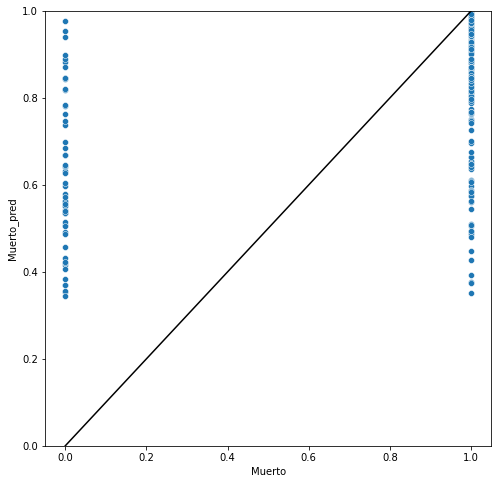

In [383]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x="Muerto", y="Muerto_pred", data=df_norm[700:1000])
plt.plot([0, 1], [0, 1], color="black")
plt.ylim(0, 1);

In [384]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Decision Tree : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

print ("Accuracy:", accuracy_score(y_test, y_pred))
print ("F1 score:", f1_score(y_test, y_pred))
print ("Recall:", recall_score(y_test, y_pred))
print ("Precision:", precision_score(y_test, y_pred))
print ("\n clasification report:\n", classification_report(y_test, y_pred))
print ("\n confussion matrix:\n",confusion_matrix(y_test, y_pred))

****************************************************
Decision Tree : 
Training Set Accuracy :  0.6342857142857142
Accuracy 0.5566666666666666 ROC 0.5550213675213675
Accuracy: 0.5566666666666666
F1 score: 0.5830721003134797
Recall: 0.5961538461538461
Precision: 0.5705521472392638

 clasification report:
               precision    recall  f1-score   support

         0.0       0.54      0.51      0.53       144
         1.0       0.57      0.60      0.58       156

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.55       300
weighted avg       0.56      0.56      0.56       300


 confussion matrix:
 [[74 70]
 [63 93]]
